In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

In [2]:
os.chdir(r"C:\Users\drang\Downloads\supply chain")
print(os.getcwd(), os.listdir())

C:\Users\drang\Downloads\supply chain ['calendar.csv', 'lasy.pdf', 'lasy2.pdf', 'merged_sales.csv', 'modelCA_1.pkl', 'modelCA_2.pkl', 'modelCA_3.pkl', 'modelCA_4.pkl', 'modelTX_1.pkl', 'modelTX_2.pkl', 'modelTX_3.pkl', 'modelWI_1.pkl', 'modelWI_2.pkl', 'modelWI_3.pkl', 'prices_low.csv', 'Rajconv.pdf', 'RAJCVBROWSER.pdf', 'Rajcvforbrowser.pdf', 'Rajcvforbrowser1.pdf', 'RajCVl.pdf', 'rajcvun.pdf', 'sales_low.csv', 'sales_train_evaluation.csv', 'sales_train_validation.csv', 'sample_submission.csv', 'sell_prices.csv', 'submission.csv', 'Waldata.pkl']


In [86]:
sales_df = pd.read_csv("sales_train_evaluation.csv", delimiter = ",")

In [87]:
sales_df.name = "sales"

In [38]:
sales_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [39]:
calendar = pd.read_csv('calendar.csv')
calendar.name = 'calendar'
prices = pd.read_csv('sell_prices.csv')
prices.name = 'prices'

In [42]:
#for testing Add zero sales for the remaining days 1942-1969
for d in range(1942,1970):
    col = 'd_' + str(d)
    sales[col] = 0
    sales[col] = sales[col].astype(np.int16)

In [43]:
sales.columns #1975 columns

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'd_1',
       'd_2', 'd_3', 'd_4',
       ...
       'd_1960', 'd_1961', 'd_1962', 'd_1963', 'd_1964', 'd_1965', 'd_1966',
       'd_1967', 'd_1968', 'd_1969'],
      dtype='object', length=1975)

In [52]:
prices1.to_csv("prices_low.csv")

In [59]:
cols = sales.dtypes.index.tolist()
types = sales.dtypes.values.tolist()

In [53]:
sales.dtypes

id          category
item_id     category
dept_id     category
cat_id      category
store_id    category
              ...   
d_1965          int8
d_1966          int8
d_1967          int8
d_1968          int8
d_1969          int8
Length: 1975, dtype: object

In [62]:
#left joining 3 df, melt for pivoting data
df = pd.melt(sales, id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], var_name='d', value_name='sold').dropna()

In [63]:
#merging
df = pd.merge(df, calendar, on='d', how='left')
df = pd.merge(df, prices, on=['store_id','item_id','wm_yr_wk'], how='left') 

In [49]:
df[df["store_id"] == 1]

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,...,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend


In [46]:
df
#df.to_csv("merged_salesq.csv")

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,weekday,...,cat_dept_sold_avg,store_item_sold_avg,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend
30490,14370,1437,3,1,0,0,1081,0,11101,3,...,0.695801,0.321533,0.216553,0.216553,1.304688,0.801758,1.020508,NaN,0.000000,-0.321533
30491,14380,1438,3,1,0,0,1081,0,11101,3,...,0.695801,0.253906,0.259766,0.259766,1.304688,0.801758,1.020508,NaN,0.000000,-0.253906
30492,14390,1439,3,1,0,0,1081,0,11101,3,...,0.695801,0.156982,0.076660,0.076660,1.304688,0.801758,1.020508,NaN,0.000000,-0.156982
30493,14400,1440,3,1,0,0,1081,0,11101,3,...,0.695801,1.694336,2.011719,2.011719,1.304688,0.801758,1.020508,NaN,0.000000,-1.694336
30494,14410,1441,3,1,0,0,1081,0,11101,3,...,0.695801,0.958984,0.755371,0.755371,1.304688,0.801758,1.020508,NaN,0.000000,-0.958984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60007364,14320,1432,2,0,0,0,1077,0,11621,3,...,2.033203,0.579590,0.797852,0.797852,1.304688,1.933594,2.464844,0.0,0.579590,-0.579590
60007365,14330,1433,2,0,0,0,1077,0,11621,3,...,2.033203,0.707520,0.430176,0.430176,1.304688,1.933594,2.464844,0.0,0.707520,-0.707520
60007366,14340,1434,2,0,0,0,1077,0,11621,3,...,2.033203,0.947754,0.704102,0.704102,1.304688,1.933594,2.464844,0.0,0.947754,-0.947754
60007367,14350,1435,2,0,0,0,1077,0,11621,3,...,2.033203,0.909180,0.637207,0.637207,1.304688,1.933594,2.464844,0.0,0.909180,-0.909180


In [4]:
df = pd.read_csv("merged_sales.csv")

C:\Users\drang\AppData\Local\Temp\ipykernel_4844\463333698.py:1: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_sales.csv")


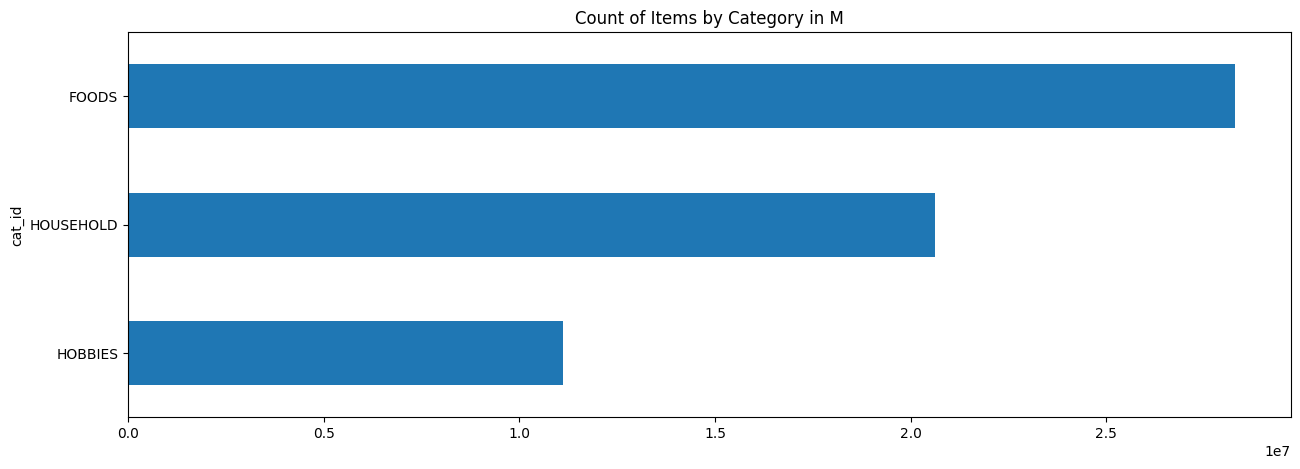

In [5]:
# bar histogram of item total counts
df.groupby('cat_id').count()['id'] \
    .sort_values() \
    .plot(kind='barh', figsize=(15, 5), title='Count of Items by Category in M')
plt.show()

In [6]:
#unique 30
df.groupby("event_name_1").nunique()

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,...,wday,month,year,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
event_name_1,,,,,,,,,,,,,,,,,,,,,
Chanukah End,152450,30490,3049,7,3,10,3,5,112,5,...,4,1,5,1,0,0,2,2,2,690
Christmas,152450,30490,3049,7,3,10,3,5,6,5,...,5,1,5,1,0,0,1,1,1,693
Cinco De Mayo,152450,30490,3049,7,3,10,3,5,101,5,...,4,1,5,1,0,0,1,1,1,706
ColumbusDay,152450,30490,3049,7,3,10,3,5,104,5,...,1,1,5,1,0,0,2,2,2,684
Easter,152450,30490,3049,7,3,10,3,5,128,5,...,1,2,5,1,1,1,2,2,2,650
Eid al-Fitr,152450,30490,3049,7,3,10,3,5,118,5,...,5,2,5,1,0,0,2,1,2,696
EidAlAdha,152450,30490,3049,7,3,10,3,5,109,5,...,5,3,5,1,0,0,2,2,2,682
Father's day,121960,30490,3049,7,3,10,3,4,118,4,...,1,1,4,1,0,0,1,1,1,677
Halloween,152450,30490,3049,7,3,10,3,5,98,5,...,5,1,5,1,0,0,1,1,1,672


(-0.5, 10.0)

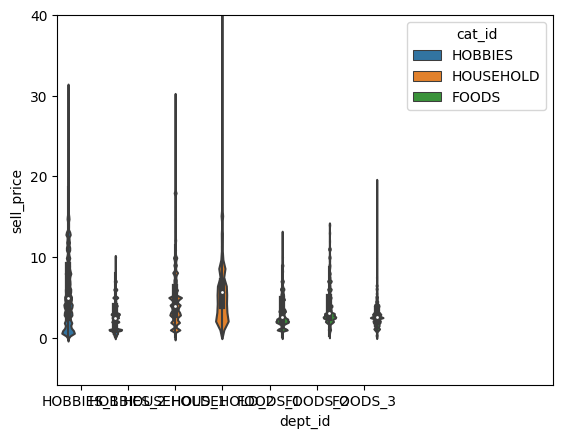

In [7]:
import seaborn as sns
ax=sns.violinplot(data=df, x="dept_id", y="sell_price", hue="cat_id", scale="count")
ax.set_ylim(ymax=40)
ax.set_xlim(xmax=10)

In [8]:
df.dtypes

Unnamed: 0        int64
id               object
item_id          object
dept_id          object
cat_id           object
store_id         object
state_id         object
d                object
sold              int64
date             object
wm_yr_wk          int64
weekday          object
wday              int64
month             int64
year              int64
event_name_1     object
event_type_1     object
event_name_2     object
event_type_2     object
snap_CA           int64
snap_TX           int64
snap_WI           int64
sell_price      float64
dtype: object

# Convert Categories to codes 2ways


In [9]:
"""from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
Category_columns = [id, item_id, dept_id, cat_id, store_id, state_id, d, date,event_name_1, event_name_2, event_type_1, event_type_2]
# Encode labels in column 'species'.
df[Category_columns]= label_encoder.fit_transform(df[Category_columns])
  
df[Category_columns].unique()"""

"from sklearn import preprocessing\n  \n# label_encoder object knows how to understand word labels.\nlabel_encoder = preprocessing.LabelEncoder()\nCategory_columns = [id, item_id, dept_id, cat_id, store_id, state_id, d, date,event_name_1, event_name_2, event_type_1, event_type_2]\n# Encode labels in column 'species'.\ndf[Category_columns]= label_encoder.fit_transform(df[Category_columns])\n  \ndf[Category_columns].unique()"

In [10]:
def catcast(df):
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        print(t)
        if t == "category":
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
                df[cols[i]] = df[cols[i]].cat.codes
    return df 

#converting dtypes for memory optimization
#Downcast in order to save memory

def downcast(df):
    #Code sourced from github
    cols = df.dtypes.index.tolist()
    types = df.dtypes.values.tolist()
    for i,t in enumerate(types):
        if 'int' in str(t):
            if df[cols[i]].min() > np.iinfo(np.int8).min and df[cols[i]].max() < np.iinfo(np.int8).max:
                df[cols[i]] = df[cols[i]].astype(np.int8)
            elif df[cols[i]].min() > np.iinfo(np.int16).min and df[cols[i]].max() < np.iinfo(np.int16).max:
                df[cols[i]] = df[cols[i]].astype(np.int16)
            elif df[cols[i]].min() > np.iinfo(np.int32).min and df[cols[i]].max() < np.iinfo(np.int32).max:
                df[cols[i]] = df[cols[i]].astype(np.int32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.int64)
        elif 'float' in str(t):
            if df[cols[i]].min() > np.finfo(np.float16).min and df[cols[i]].max() < np.finfo(np.float16).max:
                df[cols[i]] = df[cols[i]].astype(np.float16)
            elif df[cols[i]].min() > np.finfo(np.float32).min and df[cols[i]].max() < np.finfo(np.float32).max:
                df[cols[i]] = df[cols[i]].astype(np.float32)
            else:
                df[cols[i]] = df[cols[i]].astype(np.float64)
        elif t == np.object:
            if cols[i] == 'date':
                df[cols[i]] = pd.to_datetime(df[cols[i]], format='%Y-%m-%d')
            else:
                df[cols[i]] = df[cols[i]].astype('category')
                
    return df  

"""sales1 = downcast(sales)
prices1 = downcast(prices)
calendar1 = downcast(calendar)"""

In [12]:
df = downcast(df)

C:\Users\drang\AppData\Local\Temp\ipykernel_4844\2905974649.py:24: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif t == np.object:
C:\Users\drang\AppData\Local\Temp\ipykernel_4844\2905974649.py:24: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif t == np.object:
C:\Users\drang\AppData\Local\Temp\ipykernel_4844\2905974649.py:24: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this wil

In [13]:
#storing code values and their category dictionary
d_id = dict(zip(df.id.cat.codes, df.id))
d_item_id = dict(zip(df.item_id.cat.codes, df.item_id))
d_dept_id = dict(zip(df.dept_id.cat.codes, df.dept_id))
d_cat_id = dict(zip(df.cat_id.cat.codes, df.cat_id))
d_store_id = dict(zip(df.store_id.cat.codes, df.store_id))
d_state_id = dict(zip(df.state_id.cat.codes, df.state_id))
conv_list = ["d_id","d_item_id","d_dept_id","d_cat_id","d_store_id","d_state_id"]

In [14]:
dfs = catcast(df)

int32
category
category
category
category
category
category
category
int16
datetime64[ns]
int16
category
int8
int8
int16
category
category
category
category
int8
int8
int8
float16


In [15]:
df.dtypes

Unnamed: 0               int32
id                       int16
item_id                  int16
dept_id                   int8
cat_id                    int8
store_id                  int8
state_id                  int8
d                        int16
sold                     int16
date            datetime64[ns]
wm_yr_wk                 int16
weekday                   int8
wday                      int8
month                     int8
year                     int16
event_name_1              int8
event_type_1              int8
event_name_2              int8
event_type_2              int8
snap_CA                   int8
snap_TX                   int8
snap_WI                   int8
sell_price             float16
dtype: object

In [16]:
df["month"]

0           1
1           1
2           1
3           1
4           1
           ..
60034805    6
60034806    6
60034807    6
60034808    6
60034809    6
Name: month, Length: 60034810, dtype: int8

# feature engineering

In [17]:
#df.drop('date',axis=1,inplace=True) #dunt remove

In [18]:
#lag features for correlation/ intrinsic value capture across periods
#SLIDING WINDOW / number of items sold WITH GROUPBY
lags = [1,2,3,6,12,24,36]
for lag in lags:
    df['sold_lag_'+str(lag)] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],as_index=False)['sold'].shift(lag).astype(np.float16)

In [19]:
#shifting how works on single lag example 
print(df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],as_index=False)['sold'].shift(2).astype(np.float16))

          sold
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
...        ...
60034805   0.0
60034806   0.0
60034807   0.0
60034808   0.0
60034809   0.0

[60034810 rows x 1 columns]


In [20]:
df[1600:]

,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,wm_yr_wk,...,snap_TX,snap_WI,sell_price,sold_lag_1,sold_lag_2,sold_lag_3,sold_lag_6,sold_lag_12,sold_lag_24,sold_lag_36
1600,1600,30370,3037,6,2,0,0,0,0,11101,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1601,1601,30380,3038,6,2,0,0,0,0,11101,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1602,1602,30390,3039,6,2,0,0,0,0,11101,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1603,1603,30400,3040,6,2,0,0,0,0,11101,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1604,1604,30410,3041,6,2,0,0,0,0,11101,...,0,0,8.968750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60034805,60034805,14329,1432,2,0,9,2,1077,0,11621,...,0,0,2.980469,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60034806,60034806,14339,1433,2,0,9,2,1077,0,11621,...,0,0,2.480469,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60034807,60034807,14349,1434,2,0,9,2,1077,0,11621,...,0,0,3.980469,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60034808,60034808,14359,1435,2,0,9,2,1077,0,11621,...,0,0,1.280273,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df['item_sold_avg'] = df.groupby('item_id')['sold'].transform('mean').astype(np.float16)
df['state_sold_avg'] = df.groupby('state_id')['sold'].transform('mean').astype(np.float16)
df['store_sold_avg'] = df.groupby('store_id')['sold'].transform('mean').astype(np.float16)
df['cat_sold_avg'] = df.groupby('cat_id')['sold'].transform('mean').astype(np.float16)
df['dept_sold_avg'] = df.groupby('dept_id')['sold'].transform('mean').astype(np.float16)
df['cat_dept_sold_avg'] = df.groupby(['cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)
df['store_item_sold_avg'] = df.groupby(['store_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['cat_item_sold_avg'] = df.groupby(['cat_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['dept_item_sold_avg'] = df.groupby(['dept_id','item_id'])['sold'].transform('mean').astype(np.float16)
df['state_store_sold_avg'] = df.groupby(['state_id','store_id'])['sold'].transform('mean').astype(np.float16)
df['state_store_cat_sold_avg'] = df.groupby(['state_id','store_id','cat_id'])['sold'].transform('mean').astype(np.float16)
df['store_cat_dept_sold_avg'] = df.groupby(['store_id','cat_id','dept_id'])['sold'].transform('mean').astype(np.float16)

In [22]:
#ROLLING WINDOW / ROLLING 7DAY AVERAGEof sold
df['rolling_sold_mean'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(lambda x: x.rolling(window=7).mean()).astype(np.float16)

In [23]:
#EXPANDING WINDOW include all previous data of 2 minimum.
df['expanding_sold_mean'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform(lambda x: x.expanding(2).mean()).astype(np.float16)

In [24]:
df['daily_avg_sold'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id','d'])['sold'].transform('mean').astype(np.float16)
df['avg_sold'] = df.groupby(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'])['sold'].transform('mean').astype(np.float16)
df['selling_trend'] = (df['daily_avg_sold'] - df['avg_sold']).astype(np.float16)
df.drop(['daily_avg_sold','avg_sold'],axis=1,inplace=True)

In [25]:
df = df[df['d']>=36]

In [130]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5893717 entries, 57931 to 60034809
Data columns (total 43 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int16  
 1   item_id                   int16  
 2   dept_id                   int8   
 3   cat_id                    int8   
 4   store_id                  int8   
 5   state_id                  int8   
 6   d                         int16  
 7   sold                      int16  
 8   wm_yr_wk                  int16  
 9   weekday                   int8   
 10  wday                      int8   
 11  month                     int8   
 12  year                      int16  
 13  event_name_1              int8   
 14  event_type_1              int8   
 15  event_name_2              int8   
 16  event_type_2              int8   
 17  snap_CA                   int8   
 18  snap_TX                   int8   
 19  snap_WI                   int8   
 20  sell_price         

In [27]:
df.to_pickle('Waldata.pkl')


In [28]:
data = df
valid = data[(data['d']>=1914) & (data['d']<1942)][['id','d','sold']]
test = data[data['d']>=1942][['id','d','sold']]
eval_preds = test['sold']
valid_preds = valid['sold']

In [29]:
data = pd.read_pickle('Waldata.pkl')

In [43]:
data.to_csv("Walfeat.csv")

In [42]:
data["d"].sort_values( ascending=True)[:200]

C:\Users\drang\AppData\Local\Temp\ipykernel_4844\846419789.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  vdata["d"].sort_values( ascending=True)[:200]


31404699    36
31384366    36
31384367    36
31384368    36
31384369    36
            ..
31384322    36
31384323    36
31384324    36
31384325    36
31384326    36
Name: d, Length: 200, dtype: int16

In [73]:
#Get the store ids
#now predicting
import gc
import time
import joblib
from lightgbm import LGBMRegressor
stores = [i for i in range(10)]
start = time.time()
for store in stores:
    df = data[data['store_id']==store]
    df.drop("Unnamed: 0", axis=1, inplace=True)
    #Split the data
    X_train, y_train = df[df['d']<1914].drop('sold',axis=1), df[df['d']<1914]['sold']
    X_valid, y_valid = df[(df['d']>=1914) & (df['d']<1942)].drop('sold',axis=1), df[(df['d']>=1914) & (df['d']<1942)]['sold']
    X_test = df[df['d']>=1942].drop('sold',axis=1)
    
    #Train and validate
    model = LGBMRegressor(
        n_estimators=1000,
        learning_rate=0.3,
        subsample=0.8,
        colsample_bytree=0.8,
        max_depth=8,
        num_leaves=50,
        min_child_weight=300
    )
    print('*****Prediction for Store: {}*****'.format(d_store_id[store]))
    """model.fit(X_train, y_train, eval_set=[(X_train,y_train),(X_valid,y_valid)],
             eval_metric='rmse', verbose=30, early_stopping_rounds=30)
    valid_preds[X_valid.index] = model.predict(X_valid)"""
    
    filename = 'model'+str(d_store_id[store])+'.pkl'
    model = joblib.load(filename)
    eval_preds[X_test.index] = model.predict(X_test)
    
    # save model
    #joblib.dump(model, filename)
    del model, X_train, y_train, X_valid, y_valid
    gc.collect()
print("time:", time.time()-start)

C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: CA_1*****


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: CA_2*****


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: CA_3*****


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: CA_4*****


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: TX_1*****


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: TX_2*****


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: TX_3*****


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: WI_1*****


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: WI_2*****


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\467363013.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop("Unnamed: 0", axis=1, inplace=True)


*****Prediction for Store: WI_3*****
time: 88.93872332572937


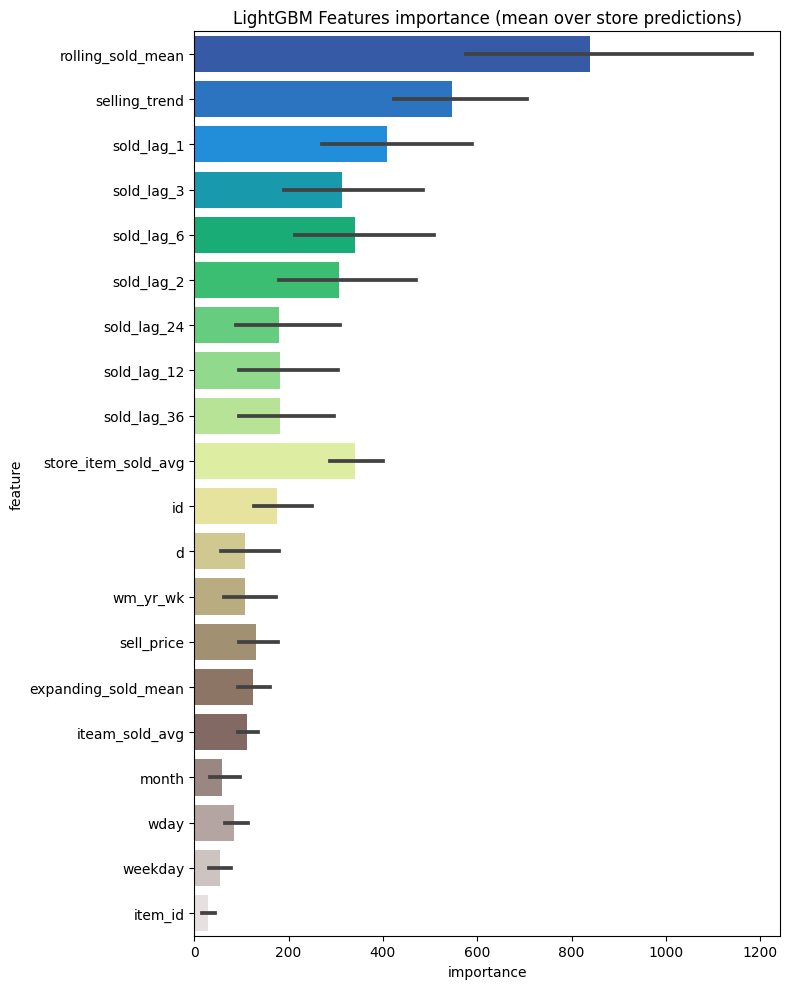

In [160]:
import joblib
import seaborn as sns
feature_importance_df = pd.DataFrame()
features = [f for f in data.columns if f != 'sold']
features.pop(0)
for filename in os.listdir(os.getcwd()):
    if 'model' in filename:
        # load model
        model = joblib.load(filename)
        store_importance_df = pd.DataFrame()
        store_importance_df["feature"] = features
        store_importance_df["importance"] = model.feature_importances_
        store_importance_df["store"] = filename[5:9] #file names last letters
        feature_importance_df = pd.concat([feature_importance_df, store_importance_df], axis=0)
        #print(store_importance_df)
def display_importances(feature_importance_df_):
    cols = feature_importance_df_[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:20].index
    best_features = feature_importance_df_.loc[feature_importance_df_.feature.isin(cols)]
    plt.figure(figsize=(8, 10))
    sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False), palette= sns.color_palette("terrain", 20))
    plt.title('LightGBM Features importance (mean over store predictions)')
    plt.tight_layout()
    
display_importances(feature_importance_df)

# convert back for BI TOOL Integrations
d_id = dict(zip(df.id.cat.codes, df.id))
d_item_id = dict(zip(df.item_id.cat.codes, df.item_id))
d_dept_id = dict(zip(df.dept_id.cat.codes, df.dept_id))
d_cat_id = dict(zip(df.cat_id.cat.codes, df.cat_id))
d_store_id = dict(zip(df.store_id.cat.codes, df.store_id))
d_state_id = dict(zip(df.state_id.cat.codes, df.state_id))
conv_list = ["d_id","d_item_id","d_dept_id","d_cat_id","d_store_id","d_state_id"]

## Results/Conclusion

In [120]:
resulty = pd.merge(data, eval_preds, left_index = True, right_index = True, how = "inner")
resulty0 = resulty[resulty['store_id']==0]
resulty0["ids"] =  resulty0.id.map(d_id)
resulty0

C:\Users\drang\AppData\Local\Temp\ipykernel_4844\899599865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resulty0["ids"] =  resulty0.id.map(d_id)


,Unnamed: 0,id,item_id,dept_id,cat_id,store_id,state_id,d,sold_x,wm_yr_wk,...,cat_item_sold_avg,dept_item_sold_avg,state_store_sold_avg,state_store_cat_sold_avg,store_cat_dept_sold_avg,rolling_sold_mean,expanding_sold_mean,selling_trend,sold_y,ids
2957530,2957530,14370,1437,3,1,0,0,1947,0,11114,...,0.216553,0.216553,1.304688,0.801758,1.020508,0.000000,0.000000,-0.321533,0,HOBBIES_1_001_CA_1_evaluation
2957531,2957531,14380,1438,3,1,0,0,1947,0,11114,...,0.259766,0.259766,1.304688,0.801758,1.020508,0.000000,0.000000,-0.253906,0,HOBBIES_1_002_CA_1_evaluation
2957532,2957532,14390,1439,3,1,0,0,1947,0,11114,...,0.076660,0.076660,1.304688,0.801758,1.020508,0.000000,0.000000,-0.156982,0,HOBBIES_1_003_CA_1_evaluation
2957533,2957533,14400,1440,3,1,0,0,1947,0,11114,...,2.011719,2.011719,1.304688,0.801758,1.020508,0.714355,0.448975,-1.694336,0,HOBBIES_1_004_CA_1_evaluation
2957534,2957534,14410,1441,3,1,0,0,1947,0,11114,...,0.755371,0.755371,1.304688,0.801758,1.020508,0.000000,0.000000,-0.958984,0,HOBBIES_1_005_CA_1_evaluation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30432064,30432064,14320,1432,2,0,0,0,1968,0,11339,...,0.797852,0.797852,1.304688,1.933594,2.464844,0.000000,0.132080,-0.579590,0,FOODS_3_823_CA_1_evaluation
30432065,30432065,14330,1433,2,0,0,0,1968,0,11339,...,0.430176,0.430176,1.304688,1.933594,2.464844,0.000000,0.989746,-0.707520,0,FOODS_3_824_CA_1_evaluation
30432066,30432066,14340,1434,2,0,0,0,1968,1,11339,...,0.704102,0.704102,1.304688,1.933594,2.464844,1.286133,0.864746,0.052246,1,FOODS_3_825_CA_1_evaluation
30432067,30432067,14350,1435,2,0,0,0,1968,0,11339,...,0.637207,0.637207,1.304688,1.933594,2.464844,1.857422,0.487549,-0.909180,0,FOODS_3_826_CA_1_evaluation


In [85]:
stores = [i for i in range(10)]
stores
#resulty = pd.merge(data, eval_preds, left_index=True, right_index=True, how='inner')
resulty["sold_y"]
resulty["sold_y"]= round(resulty["sold_y"],0)
resulty["sold_y"] = resulty["sold_y"].astype("int")

#one example
resulty0 = resulty[resulty['store_id']==0]
resulty0.drop("Unnamed: 0", axis=1, inplace=True)
resulty0[["sold_y", "id", "d"]].groupby("d").sum()

C:\Users\drang\AppData\Local\Temp\ipykernel_4844\792886780.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resulty1.drop("Unnamed: 0", axis=1, inplace=True)


,sold_y,id
d,,
1942,5986,46466760
1943,4203,46466760
1944,4425,46466760
1945,3624,46466760
1946,4099,46466760
1947,3177,46466760
1948,4801,46466760
1949,5815,46466760
1950,5925,46466760


In [118]:
#saving results csv file from 1942 to 1968


for sale in [i for i in range(10)]:
    
    rdf = resulty[resulty['store_id']==sale]
    
    #rdf["id"] =  rdf.id.map(d_id)  use conv_list to convert back  and save 
    rdf.to_csv("result{0}.csv".format(sale))


result_0
result_1
result_2
result_3
result_4
result_5
result_6
result_7
result_8
result_9


In [39]:
valid = data[(data['d']>=1914) & (data['d']<1942)][['id','d','sold']]

nee = pd.concat([ne2, valid],axis=1)
acc = np.mean(nee["pred"]==nee["sold"])
print("accuracy on validation set",acc)

accuracy on validation set 1.0


In [66]:
#total sales by CA_1 store
dfsy2 = dfs[dfs['store_id']==2]
dfsy2["salesprices"] = dfsy2["sold"] * dfsy2["sell_price"]
dfsy2["salesprices"] = dfsy2["salesprices"].fillna(0)


C:\Users\drang\AppData\Local\Temp\ipykernel_4844\3798442557.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsy2["salesprices"] = dfsy2["sold"] * dfsy2["sell_price"]
C:\Users\drang\AppData\Local\Temp\ipykernel_4844\3798442557.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfsy2["salesprices"] = dfsy2["salesprices"].fillna(0)


In [67]:
sum(dfsy2["salesprices"])
#thus tableau aggregations are correct

32699452.973625183